# Preliminaries and Dataframe Construction

In [1]:
# Import modules
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

#Formatting
plt.rcParams['font.family'] = 'Times New Roman'  # Set plt shows font to Times New Roman
plt.rcParams['axes.grid'] = True  # Ensure line graphs display on graphs
sns.set_palette(sns.color_palette('Accent')) #set color palette to a nice seaborn style https://seaborn.pydata.org/tutorial/color_palettes.html

race_order = ['Black','Hispanic', 'White']
protocol_order = ['Lottery', 'Age', 'SOFA', 'New York', 'Maryland', 'Colorado']
protocol_order_short = ['Age', 'SOFA', 'New York', 'Maryland', 'Colorado']

In [2]:
stats_overall_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Overall')
stats_race_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Race')
stats_age_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Age Group')
stats_COVID_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='COVID Status')

## Allocation Analysis

In [8]:
lott_A_rate = stats_race_50.where(stats_race_50['Protocol']=='Lottery').groupby(['Protocol', 'Race']).mean().reset_index()
lott_A_rate_dict=dict(zip(lott_A_rate['Race'], lott_A_rate['A_rate']))

stats_race_50=(stats_race_50
                .assign(A_rate_lott = lambda df_: df_['Race'].map(lott_A_rate_dict))
                .assign(A_rate_gap = lambda df_ : df_['A_rate']-df_['A_rate_lott'])
        )

In [ ]:
fig1a = plt.figure()
g1a = sns.boxplot(y='A_rate',
            x='Protocol',
            order = protocol_order,
            hue = 'Race',
            hue_order = race_order,
            data=stats_race_50,
            palette = 'plasma',
)
g1a = (g1a.set (title='Allocation Rate by Protocol and Race (50% Scarcity)', xlabel = "Protocol", ylabel = "Allocation Rate"
)
)
plt.show

## Survival Analysis

In [5]:
##Get Age_Adj_S_rates for
lott_Age_Adj_S_rate = stats_race_50.where(stats_race_50['Protocol']=='Lottery').groupby(['Protocol', 'Race']).mean().reset_index()
lott_Age_Adj_S_rate_dict=dict(zip(lott_Age_Adj_S_rate['Race'], lott_Age_Adj_S_rate['Age_Adj_S_rate']))

stats_race_50=(stats_race_50
                .assign(Age_Adj_S_rate_lott = lambda df_: df_['Race'].map(lott_Age_Adj_S_rate_dict))
                .assign(Age_Adj_S_rate_gap = lambda df_ : df_['Age_Adj_S_rate']-df_['Age_Adj_S_rate_lott'])
        )
                  

<function matplotlib.pyplot.show(close=None, block=None)>

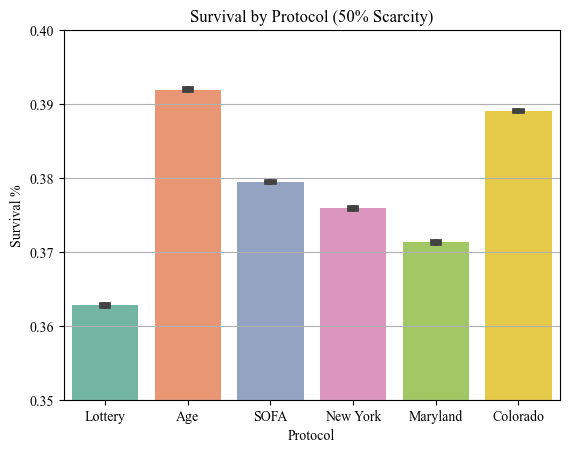

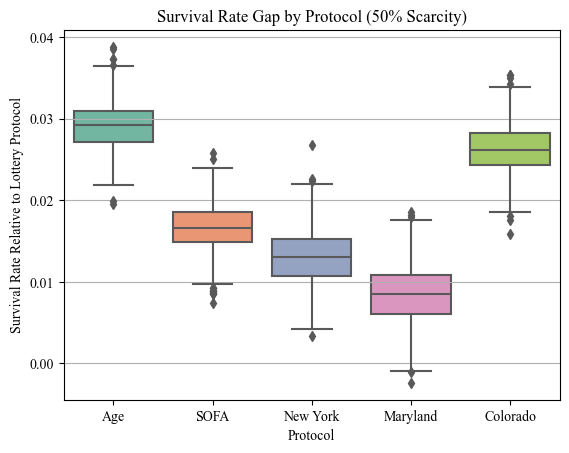

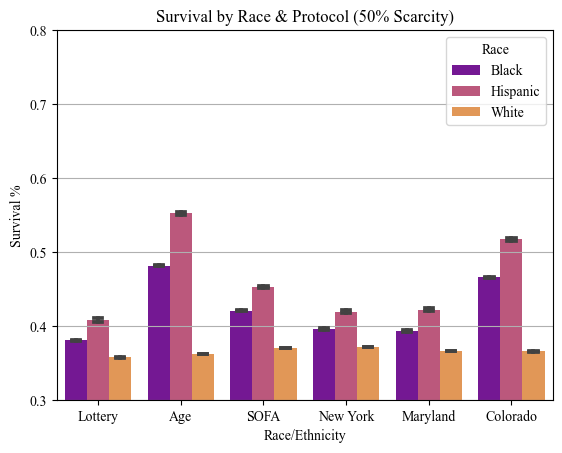

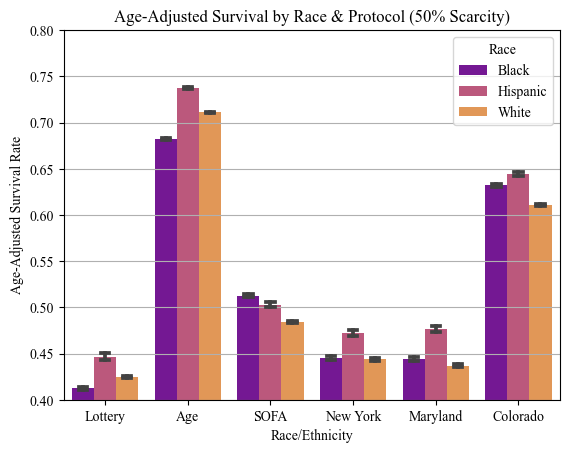

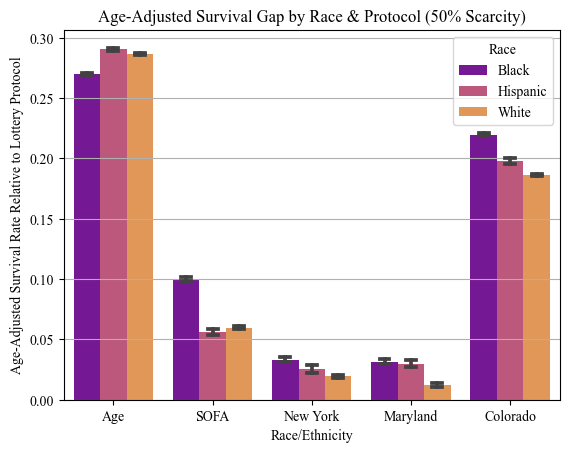

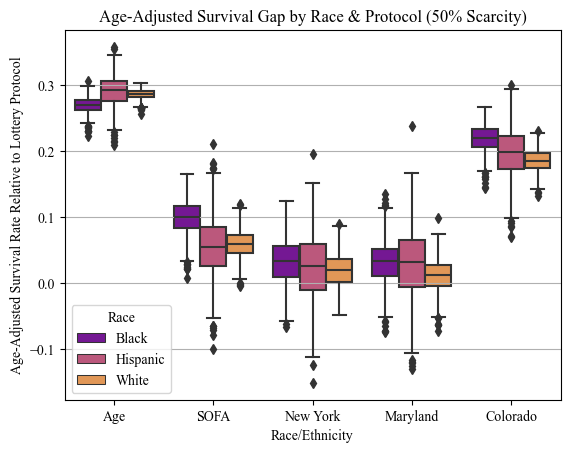

In [6]:
fig1 = plt.figure()
g1 = sns.barplot(y='S_rate',
            x='Protocol',
            order = protocol_order,
            data=stats_overall_50,
            palette = 'Set2',
            capsize = 0.1,
)
g1 = (g1.set (title='Survival by Protocol (50% Scarcity)', xlabel = "Protocol", ylabel = "Survival %", ylim=(0.35,0.4)
)
)
plt.show


fig2a = plt.figure()
g2a = sns.barplot(y='S_rate',
            x='Protocol',
            order = protocol_order,
            data=stats_race_50,
            hue = 'Race',
            hue_order= race_order,
            palette = 'plasma',
            capsize = 0.1
)
g2a = (g2a.set (title='Survival by Race & Protocol (50% Scarcity)', xlabel = "Race/Ethnicity", ylabel = "Survival %", ylim=(0.3,0.8)
)
)
plt.show

fig2b = plt.figure()
g2b = sns.barplot(y='Age_Adj_S_rate',
            x='Protocol',
            order = protocol_order,
            data=stats_race_50,
            hue = 'Race',
            hue_order= race_order,
            palette = 'plasma',
            capsize = 0.1
)
g2b = (g2b.set (title='Age-Adjusted Survival by Race & Protocol (50% Scarcity)', xlabel = "Race/Ethnicity", ylabel = "Age-Adjusted Survival Rate", ylim=(0.4,0.8)
)
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

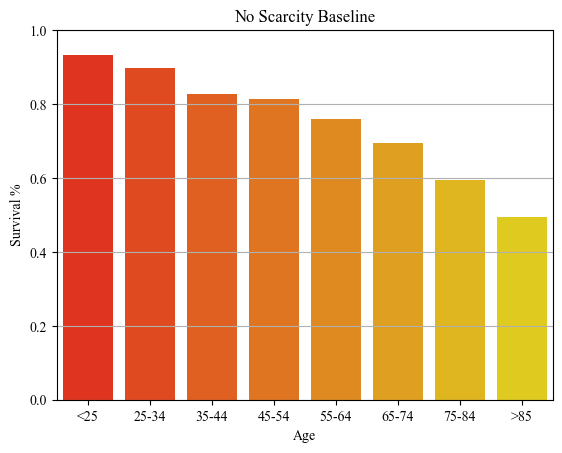

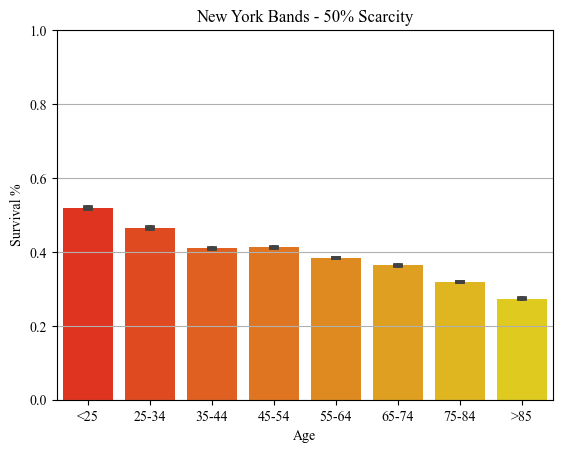

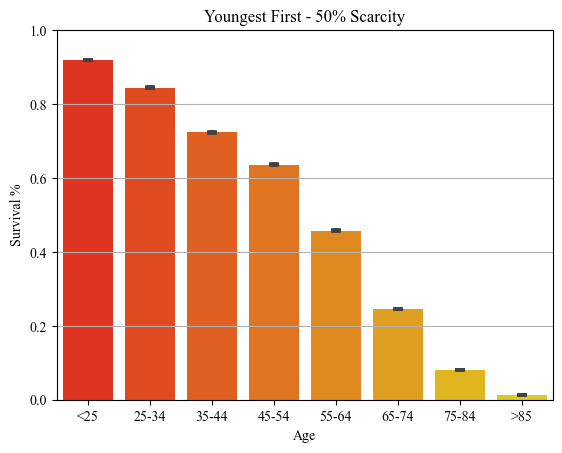

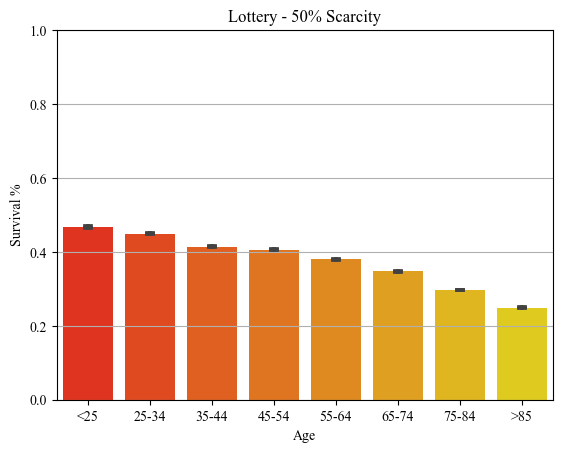

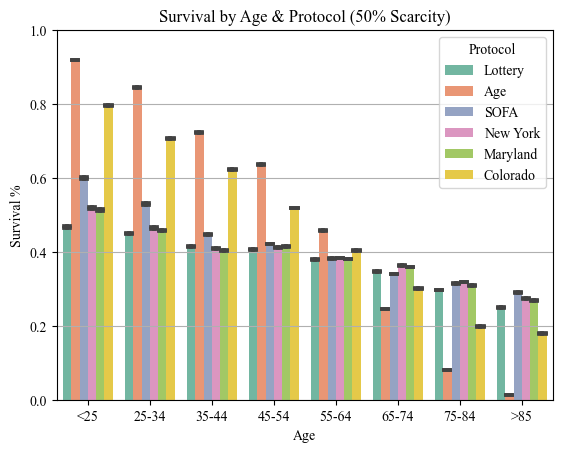

In [7]:
age_order = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85']

fig0A = plt.figure()
g0A = sns.barplot(y='S_rate',
            x='Age_Group',
            order = age_order,
            data=stats_age_50.where(stats_age_50.Protocol == 'Baseline'),
            palette = 'autumn',
            capsize = 0.1,
)
g0A = (g0A.set (title='No Scarcity Baseline', xlabel = "Age", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

fig1A = plt.figure()
g1A = sns.barplot(y='S_rate',
            x='Age_Group',
            order = age_order,
            data=stats_age_50.where(stats_age_50.Protocol == 'New York'),
            palette = 'autumn',
            capsize = 0.1,
)
g1A = (g1A.set (title='New York Bands - 50% Scarcity', xlabel = "Age", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

fig2A = plt.figure()
g2A = sns.barplot(y='S_rate',
            x='Age_Group',
            order = age_order,
            data=stats_age_50.where(stats_age_50.Protocol == 'Age'),
            palette = 'autumn',
            capsize = 0.1,
)
g2A = (g2A.set (title='Youngest First - 50% Scarcity', xlabel = "Age", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

fig3A = plt.figure()
g3A = sns.barplot(y='S_rate',
            x='Age_Group',
            data=stats_age_50.where(stats_age_50.Protocol == 'Lottery'),
            order = age_order,
            palette = 'autumn',
            capsize = 0.1,
)
g3A = (g3A.set (title='Lottery - 50% Scarcity', xlabel = "Age", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

fig4A = plt.figure()
g4A = sns.barplot(y='S_rate',
            x='Age_Group',
            hue='Protocol',
            data=stats_age_50,
            order = age_order,
            hue_order = protocol_order,
            palette = 'Set2',
            capsize = 0.1,
)
g4A = (g4A.set (title='Survival by Age & Protocol (50% Scarcity)', xlabel = "Age", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

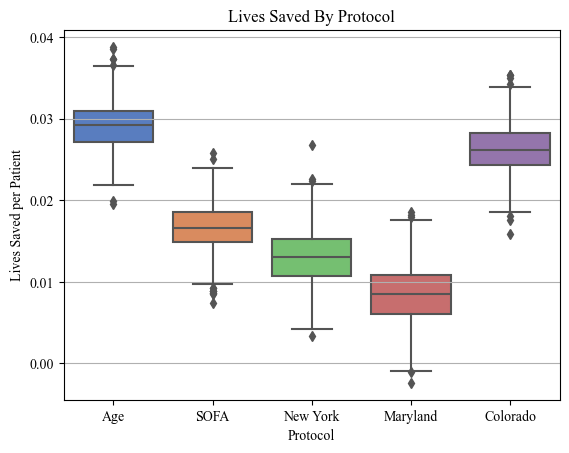

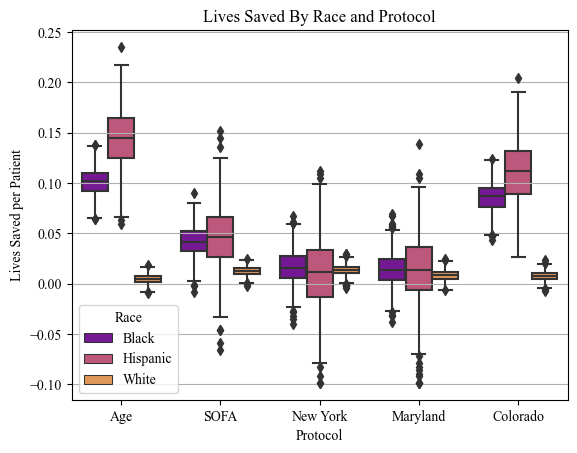

In [12]:
fig4A = plt.figure()
g4A = sns.boxplot(y='LS_rate',
            x='Protocol',
            data=stats_overall_50,
            order = protocol_order_short,
            palette = 'muted',
            #capsize = 0.1,
)
g4A = (g4A.set (title='Lives Saved By Protocol', xlabel = "Protocol", ylabel = "Lives Saved per Patient")
)
plt.show
plt.savefig("figs/Fig1A.svg", format='svg')

fig4A = plt.figure()
g4A = sns.boxplot(y='LS_rate',
            x='Protocol',
            data=stats_race_50,
            hue='Race',
            order = protocol_order_short,
            hue_order = race_order,
            palette = 'plasma',
            #capsize = 0.1,
)
g4A = (g4A.set (title='Lives Saved By Race and Protocol', xlabel = "Protocol", ylabel = "Lives Saved per Patient")
)
plt.show
plt.savefig("figs/Fig1B.svg", format='svg')

### Life Expectancy Analsyis

In [11]:
stats_Cho_overall_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Cho_Overall').replace({'Bhavani': 'Maryland'})
stats_Cho_race_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Cho_Race').replace({'Bhavani': 'Maryland'})

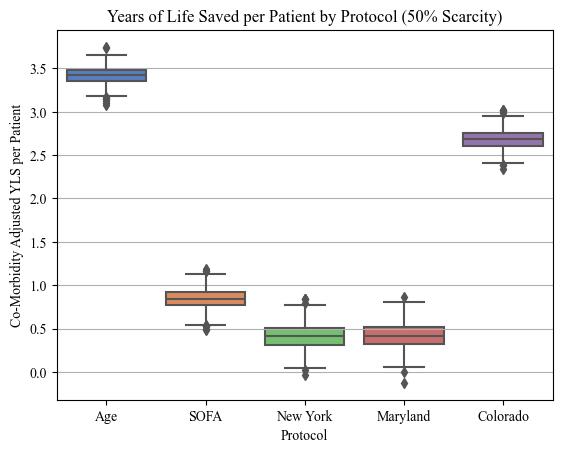

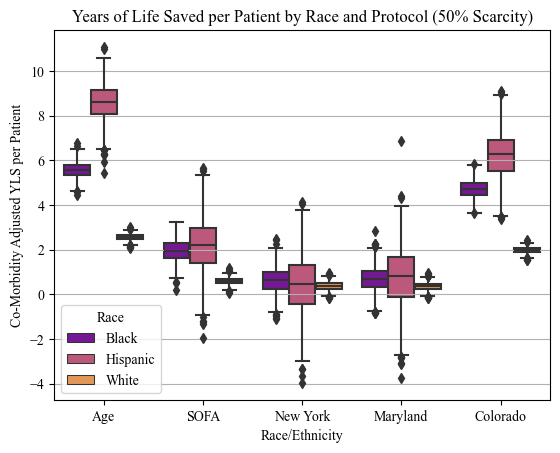

In [13]:
fig1 = plt.figure()
g1 = sns.boxplot(y='YLS_Cho_rate',
            x='Protocol',
            order = protocol_order_short,
            data=stats_Cho_overall_50,
            palette = 'muted',
            #capsize = 0.1,
)
g1 = (g1.set (title='Years of Life Saved per Patient by Protocol (50% Scarcity)', xlabel = "Protocol", ylabel = "Co-Morbidity Adjusted YLS per Patient"
)
)
plt.show
plt.savefig("figs/Fig3A.svg", format='svg')

fig2a = plt.figure()
g2a = sns.boxplot(y='YLS_Cho_rate',
            x='Protocol',
            order = protocol_order_short,
            data=stats_Cho_race_50,
            hue = 'Race',
            hue_order= race_order,
            palette = 'plasma',
            #capsize = 0.1
)
g2a = (g2a.set (title='Years of Life Saved per Patient by Race and Protocol (50% Scarcity)', xlabel = "Race/Ethnicity", ylabel = "Co-Morbidity Adjusted YLS per Patient", #ylim=(0.3,0.6)
)
)
plt.show
plt.savefig("figs/Fig3B.svg", format='svg')



## Lives Saved Versus Life Years Saved

In [14]:
LS_LYS_overall_50 = stats_overall_50.merge(stats_Cho_overall_50, on= ['Run', 'Protocol'])
LS_LYS_race_50 = stats_race_50.merge(stats_Cho_race_50, on= ['Run', 'Protocol', 'Race'])

<Figure size 640x480 with 0 Axes>

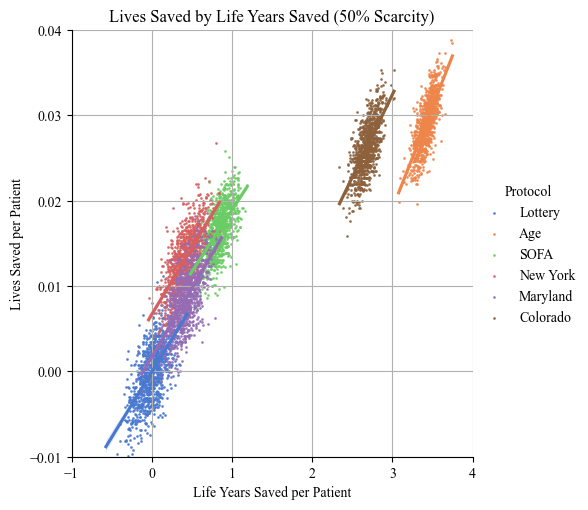

<Figure size 640x480 with 0 Axes>

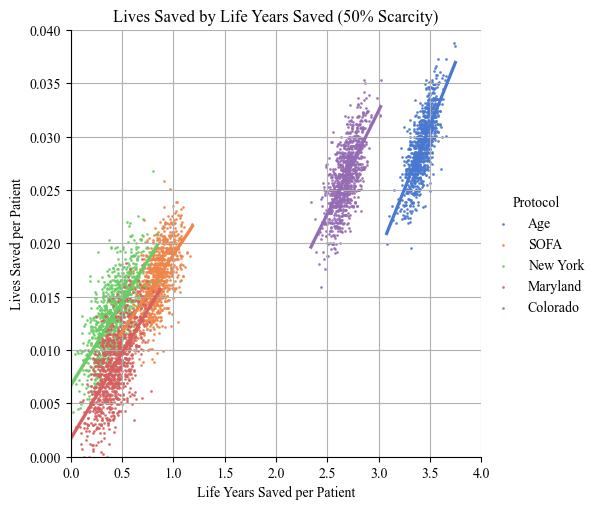

In [17]:
protocol_order_small = ['Age', 'SOFA', 'New York', 'Maryland', 'Colorado']

fig1 = plt.figure()
g1 = sns.lmplot(y='LS_rate',
            x='YLS_Cho_rate',
            hue = 'Protocol',
            #col = 'Protocol',
            #col_wrap=2,
            #col_order = protocol_order,
            hue_order=protocol_order,
            data=LS_LYS_overall_50,
            palette = 'muted',
            scatter_kws={"s": 1}
)
g1 = (g1.set (title='Lives Saved by Life Years Saved (50% Scarcity)', xlabel = "Life Years Saved per Patient", ylabel = "Lives Saved per Patient", ylim=(-0.01, 0.04), xlim=(-1, 4))
)
plt.show

fig2 = plt.figure()
g2 = sns.lmplot(y='LS_rate',
            x='YLS_Cho_rate',
            hue = 'Protocol',
            #col = 'Protocol',
            #col_wrap=2,
            #col_order = protocol_order,
            hue_order=protocol_order_short,
            data=LS_LYS_overall_50,
            palette = 'muted',
            scatter_kws={"s": 1}
)
g2 = (g2.set (title='Lives Saved by Life Years Saved (50% Scarcity)', xlabel = "Life Years Saved per Patient", ylabel = "Lives Saved per Patient", ylim=(0, 0.04), xlim=(0, 4))
)
plt.show
plt.savefig("figs/Fig4.svg", format='svg')